### Logistic Regression - Diabetes Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1. Problem Statement

### 2. Data Gathering

In [2]:
df = pd.read_csv('diabetes.csv')
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


### 3. EDA and Feature Engineering

In [5]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


##### Target Column

In [7]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

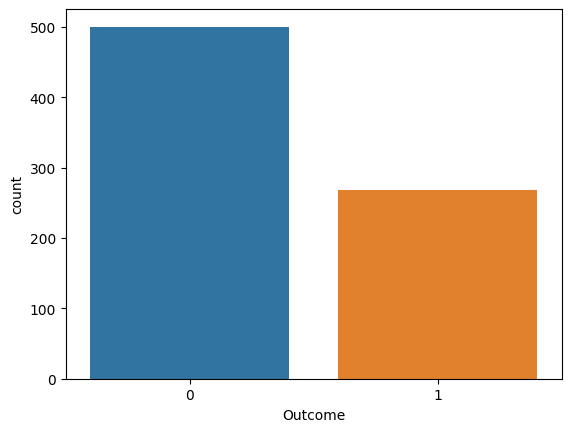

In [9]:
sns.countplot(x = df['Outcome'])

### 4. Model Training 

##### Train Test Split

In [10]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y,      
                                test_size=0.2,                                                     
                                random_state=1,
                                stratify=y)
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [13]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

#### Model Evaluation

In [14]:
logistic_clf.score(x_train,y_train)

0.7915309446254072

In [15]:
logistic_clf.score(x_test,y_test)

0.7402597402597403

In [16]:
y_pred = logistic_clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [18]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [17]:
confusion_matrix(y_test, y_pred)

array([[86, 14],
       [26, 28]], dtype=int64)

In [19]:
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



##### Positive Class

In [44]:
TN = 86
TP = 28
FP = 14
FN = 26

In [47]:
Precision = TP/(TP + FP)
Precision

0.6666666666666666

In [49]:
Recall = TP/(TP + FN)
Recall

0.5185185185185185

In [51]:
F1_Score = (2 * Precision * Recall) / (Precision + Recall)
F1_Score

0.5833333333333334

In [53]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

##### Negative Class 

In [ ]:
TN = 86
TP = 28
FP = 14
FN = 26

In [54]:
Precision = TN/(TN + FN)
Precision

0.7678571428571429

In [55]:
Recall = TN/(TN + FP)
Recall

0.86

In [57]:
F1_Score = (2 * Precision * Recall) / (Precision + Recall)
F1_Score

0.8113207547169812

In [59]:
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [20]:
# Evaluation on Testing Data

y_pred = logistic_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :\n",accuracy)
print("*"*50)


Confusion Matrix :
 [[86 14]
 [26 28]]
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

**************************************************
Accuracy :
 0.7402597402597403
**************************************************


In [21]:
# Evaluation on Training Data

y_pred_train = logistic_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :\n",accuracy)
print("*"*50)

Confusion Matrix :
 [[359  41]
 [ 87 127]]
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       400
           1       0.76      0.59      0.66       214

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.78       614

**************************************************
Accuracy :
 0.7915309446254072
**************************************************


In [108]:
TP = 127
TN = 359
FP = 41
FN = 87

In [110]:
TPR = TP/(TP+FN)
TPR

0.5934579439252337

In [111]:
FPR = FP/(FP+TN)
FPR

0.1025

### ROC Curve

In [85]:
logistic_clf.predict_proba(x_train)

array([[0.68127273, 0.31872727],
       [0.18556568, 0.81443432],
       [0.86075534, 0.13924466],
       ...,
       [0.44005473, 0.55994527],
       [0.52849612, 0.47150388],
       [0.03185441, 0.96814559]])

In [91]:
logistic_clf.predict_proba(x_train).shape

(614, 2)

In [93]:
y_pred_train_prob = logistic_clf.predict_proba(x_train)
y_pred_train_prob

array([[0.68127273, 0.31872727],
       [0.18556568, 0.81443432],
       [0.86075534, 0.13924466],
       ...,
       [0.44005473, 0.55994527],
       [0.52849612, 0.47150388],
       [0.03185441, 0.96814559]])

In [ ]:
[0.44005473, 0.55994527], >> Class1
[0.52849612, 0.47150388], >> Class0
[0.03185441, 0.96814559]] >> Class1

In [94]:
y_test[50:55]

83     0
255    1
286    0
560    1
389    0
Name: Outcome, dtype: int64

In [95]:
y_pred_train_prob[50:55]

array([[0.53438445, 0.46561555],
       [0.73966545, 0.26033455],
       [0.09947603, 0.90052397],
       [0.93799112, 0.06200888],
       [0.57450824, 0.42549176]])

In [ ]:
[0.53438445, 0.46561555] >> Class0
[0.73966545, 0.26033455] >> Class0
[0.09947603, 0.90052397] >> Class1
[0.93799112, 0.06200888] >> Class0
[0.57450824, 0.42549176] >> Class0

y_pred_train = [0 0 1 0 0]

In [ ]:
Class0 Prob     Prediction
[0.46561555] >> Class0
[0.26033455] >> Class0
[0.90052397] >> Class1
[0.06200888] >> Class0
[0.42549176] >> Class0

y_pred_train = [0 0 1 0 0]

In [97]:
y_pred_train[50:55]

array([0, 0, 1, 0, 0], dtype=int64)

In [100]:
# y_pred_train_prob[:,1]

In [102]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_train_prob[:,1])
fpr

array([0.    , 0.    , 0.0025, 0.0025, 0.005 , 0.005 , 0.0075, 0.0075,
       0.01  , 0.01  , 0.0125, 0.0125, 0.015 , 0.015 , 0.02  , 0.02  ,
       0.0225, 0.0225, 0.0275, 0.0275, 0.03  , 0.03  , 0.0325, 0.0325,
       0.035 , 0.035 , 0.045 , 0.045 , 0.0475, 0.0475, 0.05  , 0.05  ,
       0.0525, 0.0525, 0.0575, 0.0575, 0.06  , 0.06  , 0.0625, 0.0625,
       0.0725, 0.0725, 0.075 , 0.075 , 0.0775, 0.0775, 0.085 , 0.085 ,
       0.0875, 0.0875, 0.09  , 0.09  , 0.0925, 0.0925, 0.095 , 0.095 ,
       0.0975, 0.0975, 0.1   , 0.1   , 0.1025, 0.1025, 0.11  , 0.11  ,
       0.1125, 0.1125, 0.1175, 0.1175, 0.1225, 0.1225, 0.125 , 0.125 ,
       0.1475, 0.1475, 0.1525, 0.1525, 0.1575, 0.1575, 0.1625, 0.1625,
       0.17  , 0.17  , 0.1725, 0.1725, 0.175 , 0.175 , 0.1825, 0.1825,
       0.185 , 0.185 , 0.1925, 0.1925, 0.195 , 0.195 , 0.1975, 0.1975,
       0.2025, 0.2025, 0.21  , 0.21  , 0.22  , 0.22  , 0.245 , 0.245 ,
       0.2575, 0.2575, 0.26  , 0.26  , 0.2675, 0.2675, 0.27  , 0.27  ,
      

In [104]:
tpr

array([0.        , 0.0046729 , 0.0046729 , 0.02336449, 0.02336449,
       0.05140187, 0.05140187, 0.07476636, 0.07476636, 0.20093458,
       0.20093458, 0.20560748, 0.20560748, 0.21028037, 0.21028037,
       0.23364486, 0.23364486, 0.23831776, 0.23831776, 0.25700935,
       0.25700935, 0.27570093, 0.27570093, 0.28037383, 0.28037383,
       0.30841121, 0.30841121, 0.34579439, 0.34579439, 0.35046729,
       0.35046729, 0.36448598, 0.36448598, 0.36915888, 0.36915888,
       0.37850467, 0.37850467, 0.42523364, 0.42523364, 0.42990654,
       0.42990654, 0.44392523, 0.44392523, 0.45327103, 0.45327103,
       0.47196262, 0.47196262, 0.50934579, 0.50934579, 0.51401869,
       0.51401869, 0.51869159, 0.51869159, 0.52803738, 0.52803738,
       0.56074766, 0.56074766, 0.57943925, 0.57943925, 0.58411215,
       0.58411215, 0.59813084, 0.59813084, 0.60280374, 0.60280374,
       0.60747664, 0.60747664, 0.61214953, 0.61214953, 0.62616822,
       0.62616822, 0.63551402, 0.63551402, 0.64018692, 0.64018

In [115]:
np.where(np.around(thresh,3) == 0.499)
thresh[61]

0.49939637048706514

In [116]:
tpr[61]

0.5981308411214953

In [117]:
fpr[61]

0.1025

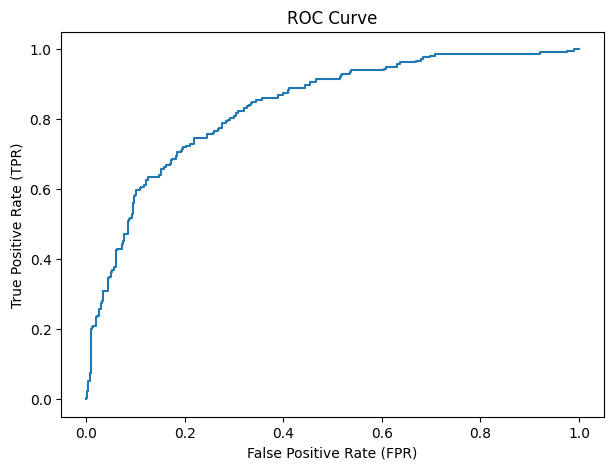

In [122]:
plt.figure(figsize=(7,5))
plt.title("ROC Curve")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.savefig("ROC_Curve.png")

In [126]:
x = 0.9158

In [129]:
tpr
np.where(tpr> x)

(array([153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
        179, 180, 181, 182, 183, 184, 185, 186, 187, 188], dtype=int64),)

In [131]:
tpr[153]

0.9158878504672897

In [133]:
fpr[153]

0.4675

In [135]:
thresh[153]

0.19955318584783607

In [142]:
y_pred_train_prob[:,1][78]

0.9183601085064717

In [148]:
# y_pred_train_prob[:,1]

def get_pred_class(threshold, pred_prob):
    print("Predicted prob is :",pred_prob)
    if pred_prob >= threshold:
        return "Class1"
    
    else:
        return "Class0"

threshold = thresh[153] # 0.199

pred_class = get_pred_class(threshold, y_pred_train_prob[:,1][200])
print("Predicted Class is :",pred_class)

Predicted prob is : 0.11204222614435623
Predicted Class is : Class0


### Prediction on Single Row

In [22]:
x_test[25:26]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
66,109,88,30,0,32.5,0.855,38


In [23]:
logistic_clf.classes_

array([0, 1], dtype=int64)

In [24]:
logistic_clf.coef_

array([[ 3.27549458e-02, -1.59326422e-02, -4.93564132e-03,
        -3.57130489e-04,  9.32155238e-02,  1.06163174e+00,
         3.54855178e-02]])

In [25]:
logistic_clf.n_features_in_

7

In [26]:
Glucose = 120
BloodPressure = 90
SkinThickness = 32
Insulin = 0
BMI = 35.34
DiabetesPedigreeFunction = 0.867
Age = 42

test_array = np.array([Glucose,BloodPressure,SkinThickness,Insulin, BMI, DiabetesPedigreeFunction,
                      Age], ndmin = 2)

pred_class = logistic_clf.predict(test_array)[0]
print("Predicted Class by using 0.5 threshold is : Class",pred_class)


Predicted Class by using 0.5 threshold is : Class 0


In [169]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='Glucose', ylabel='BloodPressure'>

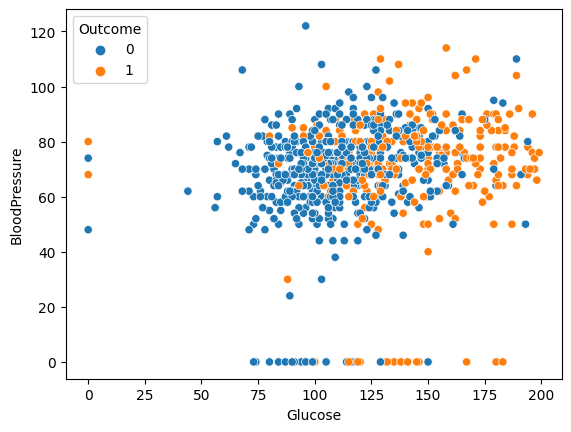

In [171]:
sns.scatterplot(x = df['Glucose'], y = df['BloodPressure'], hue = df['Outcome'])